In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('Bank_Churn.csv')
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
train.tail()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [4]:
# Removing RowNumber and CustomerId column
train.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


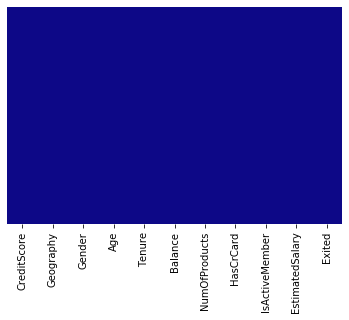

In [5]:
#check for columnwise null values, if it is present the heatmap will show yellow lines for every row
sns.heatmap(train.isnull(),yticklabels=False,cmap='plasma',cbar=False)
plt.show()

In [6]:
train.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


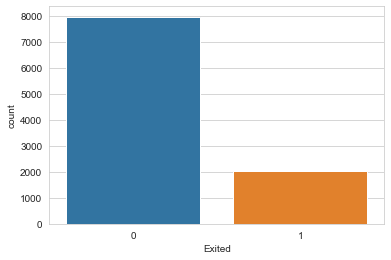

In [8]:
#check the count of 'Exited' customers
sns.set_style('whitegrid')
sns.countplot(x='Exited',data=train)

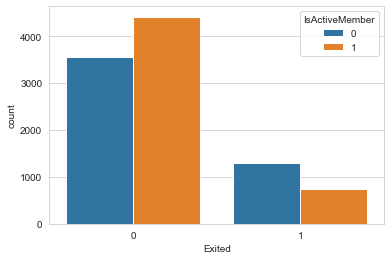

In [10]:
#check the count of customers who exited the bank and active member
sns.countplot(x='Exited',hue='IsActiveMember',data=train)

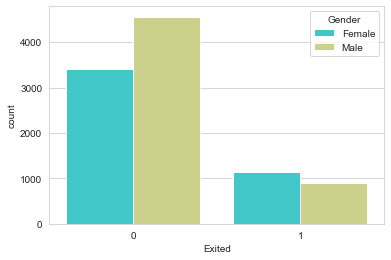

In [11]:
#check for genderwise count of customers who 'exited' from bank
sns.countplot(x='Exited',hue='Gender',data=train,palette='rainbow')

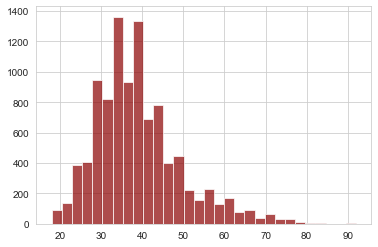

In [12]:
#check the histogram for all customers agewise

train['Age'].hist(bins=30,color='darkred',alpha=0.7)

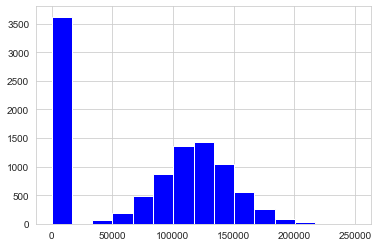

In [13]:
#histogram for average balance customers have in there account
train['Balance'].hist(color='blue',bins=15)

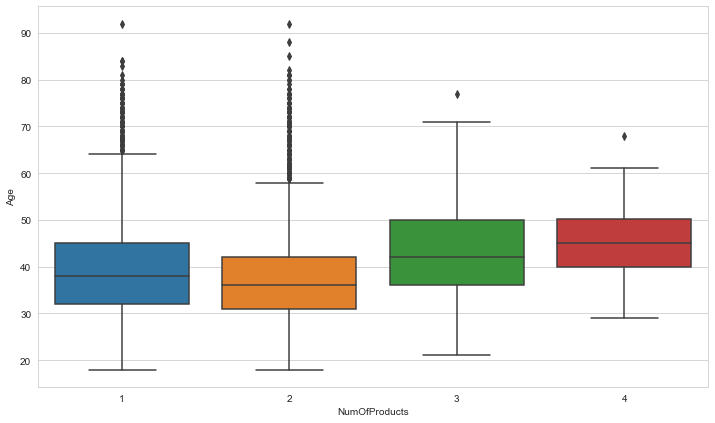

In [14]:
#agewise active products
plt.figure(figsize=(12,7))
sns.boxplot(x='NumOfProducts',y='Age',data=train)

In [9]:
#converting gender to 0 and 1
#drop non numeric columns
Gender = pd.get_dummies(train['Gender'],drop_first=True)
Geography = pd.get_dummies(train['Geography'],drop_first=True)
train = pd.concat([train,Gender,Geography],axis=1)
train.drop(['Gender','Geography'],axis=1,inplace=True)
train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [10]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split


In [11]:
# Spliting data into train and test
X = train.drop('Exited',axis=1)
Y = train.Exited
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [12]:
# Importing LogisticsRegression from sklearn
from sklearn.linear_model import LogisticRegression

In [13]:
# fit model on training data
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# Testing the model on X_Test
Y_pred = model.predict(x_test)

In [15]:
# Model Evaluation
from sklearn.metrics import classification_report,accuracy_score

In [16]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      1577
           1       0.36      0.05      0.08       423

    accuracy                           0.78      2000
   macro avg       0.58      0.51      0.48      2000
weighted avg       0.70      0.78      0.71      2000



In [17]:
print(accuracy_score(y_test,Y_pred))

0.781
